In [ ]:
#https://www.kaggle.com/datasets/taseermehboob9/salary-dataset-of-business-levels/data
#POLYNOMIAL LINEAR REGRESSION : LINEAR BECAUSE THE EXPONENT OF COFFICIENT IS ONE

In [ ]:
# in general importing of libraries
import numpy as np
import pandas as pd

#for graphs ploting
import matplotlib.pyplot as plt

#for creating polynomial data
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

#for training model using linerregression and sgdregressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor

#for checking accuracy
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
#generating random numbers between -3 and +3
X = 6*np.random.rand(200,1) - 3
#relation eqaution of y with noice (y+0.8x^2 +v0.9x + 2) which is a polynomial of degree 2
y = 0.8*X**2 + 0.9*X + 2 + np.random.randn(200,1)

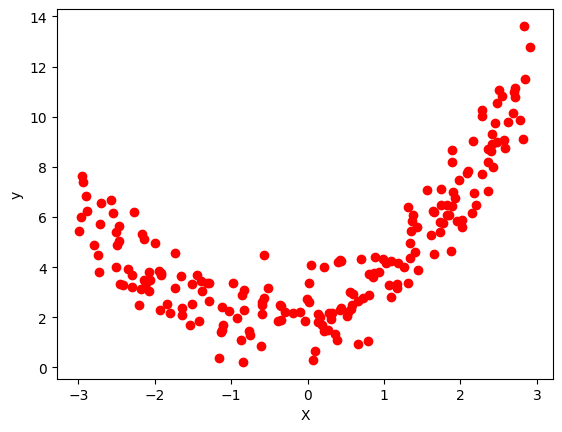

In [ ]:
plt.scatter(X,y,color='r')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
plr=  LinearRegression()

In [ ]:
plr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = plr.predict(X_test)
r2_score(y_test,y_pred)

0.3357041437230751

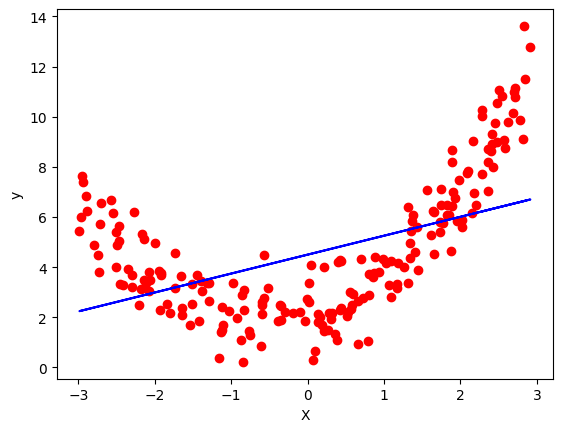

In [ ]:
plt.scatter(X,y,color='r')
plt.plot(X,plr.predict(X),color='b')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

In [ ]:
print(X_train[0])
print(X_train_trans[0])

[2.40022493]
[1.         2.40022493 5.76107974]


In [ ]:
plr = LinearRegression()
plr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred = plr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8683854616390714

In [ ]:
print(plr.coef_)
print(plr.intercept_)

[[0.         0.8605893  0.77111501]]
[2.17800638]


In [ ]:
X_new= np.linspace(-3,3,100).reshape(100,1)

X_new_poly = poly.transform(X_new)
y_new = plr.predict(X_new_poly)

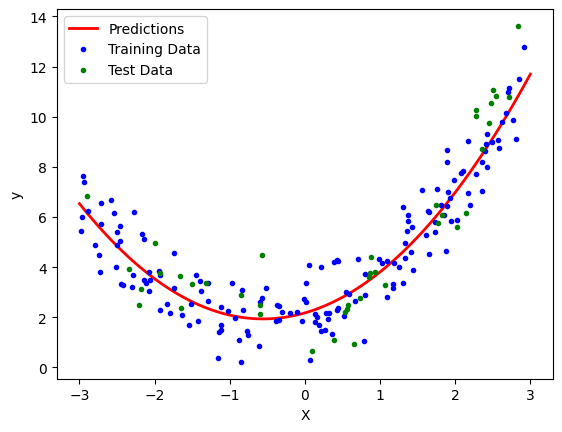

In [ ]:
plt.plot(X_new, y_new,"r", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label="Training Data")
plt.plot(X_test, y_test, "g.", label="Test Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
#defining our own polynomial function

def polynomial_regression(degree):
  X_new=np.linspace(-3,3,100).reshape(100,1)
  X_new__poly = poly.transform(X_new)

  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ("poly_features", polybig_features),
      ("std_scaler", std_scaler),
      ("lin_reg", lin_reg),
  ])
  polynomial_regression.fit(X, y)

  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_newbig, "r", linewidth=2, label=str(degree))
  plt.plot(X_train, y_train, "b.", label="Training Data")
  plt.plot(X_test, y_test, "g.", label="Test Data")
  plt.legend()
  plt.xlabel("X")
  plt.ylabel("y")
  plt.axis([-3, 3, 0, 10])
  plt.show()


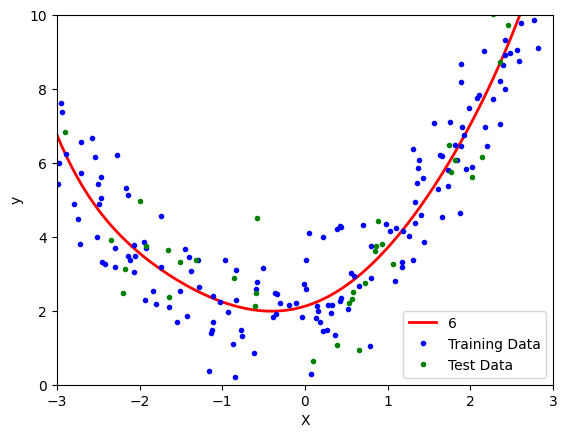

In [ ]:
polynomial_regression(6)

In [ ]:
x= 7*np.random.rand(100,1)-2.8
y= 7*np.random.rand(100,1)-2.8

z= x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 +np.random.randn(100,1)

In [ ]:
import plotly.express as px
df = px.data.iris()
fig =px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [ ]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(),x.max(),10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid,yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_pred = lr.predict(final)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_pred.reshape(10,10)))
fig.show()

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_multi)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:
print("input",poly.n_features_in_)
print("output",poly.n_output_features_)
print("power/n",poly.powers_)

input 2
output 6
power/n [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]



 [0 0] first term
 [1 0] second term
 [0 1] third term
 [2 0] fourth term
 [1 1] fifth term
 [0 2] sixth term**


In [ ]:
X_multi_trans.shape

(100, 6)

In [ ]:
plr = LinearRegression()
plr.fit(X_multi_trans,z)

LinearRegression()

In [ ]:
X_final = poly.transform(final)

In [ ]:
z_final = plr.predict(X_final).reshape(10,10)

In [ ]:
fig = px.scatter_3d(x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene = dict(zaxis =dict(range=[0,35])))
fig.show()